In [1]:
# Setting environment for McStas execution, see mcstas/bin/mccodeenv.bat
import os
import shutil
PATH = os.environ['PATH']
%set_env PATH=C:\\mcstas-3.5.24\\bin;C:\\mcstas-3.5.24\\miniconda3;C:\\mcstas-3.5.24\\miniconda3\\Scripts\\;C:\\mcstas-3.5.24\\miniconda3\\Library\\bin;C:\\mcstas-3.5.24\\miniconda3\\Library\\mingw-w64\\bin;c:\\strawberry\\perl\\bin;c:\\Microsoft MPI\\Bin;$PATH
# McStas related:
%set_env MCSTAS=C:\\mcstas-3.5.24\\lib
%set_env MCSTAS_TOOLS=C:\\mcstas-3.5.24\\lib\\tools\\Perl\\
%set_env MCSTAS_CC=gcc
%set_env MCSTAS_FORMAT=
# PGPLOT configuration
%set_env PGPLOT_DIR=c:\\strawberry\\perl\\site\\lib\\PGPLOT\\pgplot_supp
%set_env PGPLOT_FONT=c:\\strawberry\\perl\\site\\lib\\PGPLOT\\pgplot_supp\\grfont.dat
%set_env PGPLOT_DEV=/gw

env: PATH=C:\\mcstas-3.5.24\\bin;C:\\mcstas-3.5.24\\miniconda3;C:\\mcstas-3.5.24\\miniconda3\\Scripts\\;C:\\mcstas-3.5.24\\miniconda3\\Library\\bin;C:\\mcstas-3.5.24\\miniconda3\\Library\\mingw-w64\\bin;c:\\strawberry\\perl\\bin;c:\\Microsoft MPI\\Bin;C:\Users\glavic_a\.conda\envs\mcstas_ba;C:\Users\glavic_a\.conda\envs\mcstas_ba\Library\mingw-w64\bin;C:\Users\glavic_a\.conda\envs\mcstas_ba\Library\usr\bin;C:\Users\glavic_a\.conda\envs\mcstas_ba\Library\bin;C:\Users\glavic_a\.conda\envs\mcstas_ba\Scripts;C:\Users\glavic_a\.conda\envs\mcstas_ba\bin;C:\ProgramData\Anaconda3\condabin;C:\Program Files\Microsoft MPI\Bin;C:\Program Files\ImageMagick;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0;C:\Windows\System32\OpenSSH;C:\Program Files\PSI Tools;C:\Program Files\NVIDIA Corporation\NVIDIA NvDLISR;C:\Program Files\NeXus Data Format\bin;C:\strawberry\c\bin;C:\strawberry\perl\site\bin;C:\strawberry\perl\bin;C:\WINDOWS\system32;C:\WINDOWS;C:

In [2]:
os.chdir('mcstas')

In [3]:
# Compile McStas models
!mcstas -o GISANS_test.c GISANS_test.instr
!gcc -O2 -o GISANS_test.exe GISANS_test.c -lm -lws2_32


-----------------------------------------------------------

Generating single GPU kernel or single CPU section layout: 
-> SPLIT N at component test

-----------------------------------------------------------

Generating GPU/CPU -DFUNNEL layout:
-> SPLIT within buffer at component test

-----------------------------------------------------------


CFLAGS=


In [12]:
# Create events for sample position, need to remove directory if it exists
try:
    shutil.rmtree('output')
except FileNotFoundError:  pass
!.\GISANS_test.exe -n 1e4 -d .\output\ collimation=10.0 source_size=0.01

[GISANS_test] Initialize
  Handshake message sent, ACK

Trace ETA (single process) 2.66667 [min] 
10 %
*** TRACE end *** 

Save [GISANS_test]
Detector: total_in_I=99922.4 total_in_ERR=999.837 total_in_N=10000 "total_in.L"
Detector: total_out_I=66154.7 total_out_ERR=410.831 total_out_N=808602 "total_out.L"
Detector: detector_I=66135.5 detector_ERR=410.83 detector_N=690493 "detector.psd"

Finally [GISANS_test: .\output]. Time: 1.56667 [min] 


In [13]:
# plot the resulting simulation
%matplotlib inline
from pylab import *
from matplotlib.colors import LogNorm
from mcstas_reader import McSim

In [14]:
data=McSim('output')['detector']

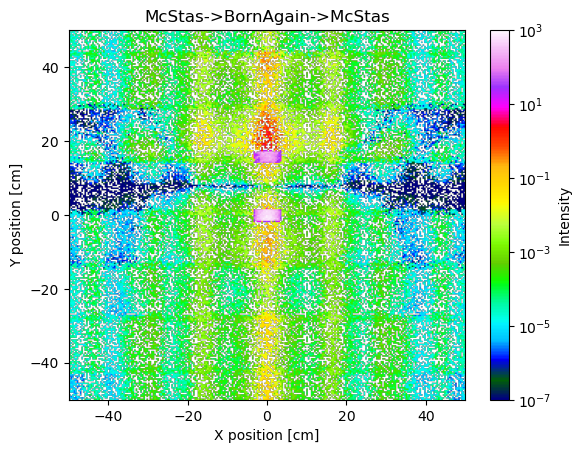

In [15]:
data.plot(norm=LogNorm(1e-7, 1e3), cmap='gist_ncar', cbar=True)
title('McStas->BornAgain->McStas');